# Scroll temperature 


In [1]:
%matplotlib inline
import argparse
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import Reader
import pandas as pd


In [2]:
def plot_series_twoscales(y1, y2, l1="l1", l2="l2"):
    fig, ax1 = plt.subplots()
    y1.plot(color="b", ax=ax1 )
    ax1.set_ylabel(l1, color='b')
    ax12 = ax1.twinx()
    y2.plot(color="r", ax=ax12 )
    ax12.set_ylabel(l2, color='r')
    ax12.tick_params('y', colors='r')
    return (fig, ax1)

Load files

In [3]:
filename = "/Users/phansson/work/climeon/data/M6/MainLog/Datalog_2018_05_16_14_14_53.csv"
# open and process
f = Reader.LogFileType1(filename)


Process headers
got 103 headers
Process data
got data with shape (11584, 103)
Process date and time.
got 11584 date/times 
Create data frame


In [4]:
#filename_2 = "/Users/phansson/work/climeon/data/M6/MainLog/Datalog_2018_05_17_08_15_45.csv"
# open and process
#f2 = Reader.LogFileType1(filename_2)



## Overview of runs
First run with new scroll temperature sensors.

### Turbine speed and power

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10ab94d30>)

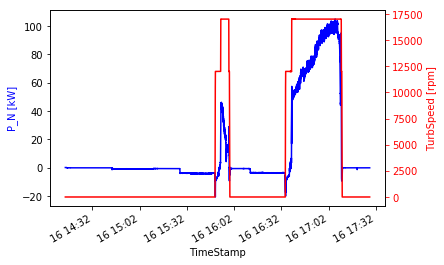

In [5]:
plot_series_twoscales(f.df['P_N [kW]'], f.df['TurbSpeed [rpm]'],
                      l1='P_N [kW]', l2='TurbSpeed [rpm]')


In [6]:
#plot_series_twoscales(f2.df['P_N [kW]'], f2.df['TurbSpeed [rpm]'],
#                      l1='P_N [kW]', l2='TurbSpeed [rpm]')

### Hot and cold water
An alarm went off and tripped the heater. This is why the run was cancelled as well.

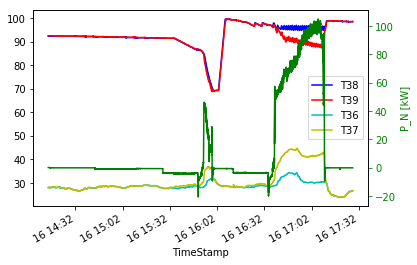

In [7]:
fig30, ax30 = plt.subplots()
f.df['T38 [deg C]'].plot(ax=ax30, color='b', label='T38')
f.df['T39 [deg C]'].plot(ax=ax30, color='r', label='T39')
f.df['T36 [deg C]'].plot(ax=ax30, color='c', label='T36')
f.df['T37 [deg C]'].plot(ax=ax30, color='y', label='T37')
ax302 = ax30.twinx()
f.df['P_N [kW]'].plot(ax=ax302, color='g')
ax302.set_ylabel('P_N [kW]', color='g')
ax302.tick_params('y', colors='g')
ax30.legend(loc=0)

Compare the two new scroll temperature sensors to T51 (scroll input)

ScrollExtT: Taped on the outside of bottom of scroll
ScrollDraintT: inserted into drain channel, platinum sensor is right under drain.

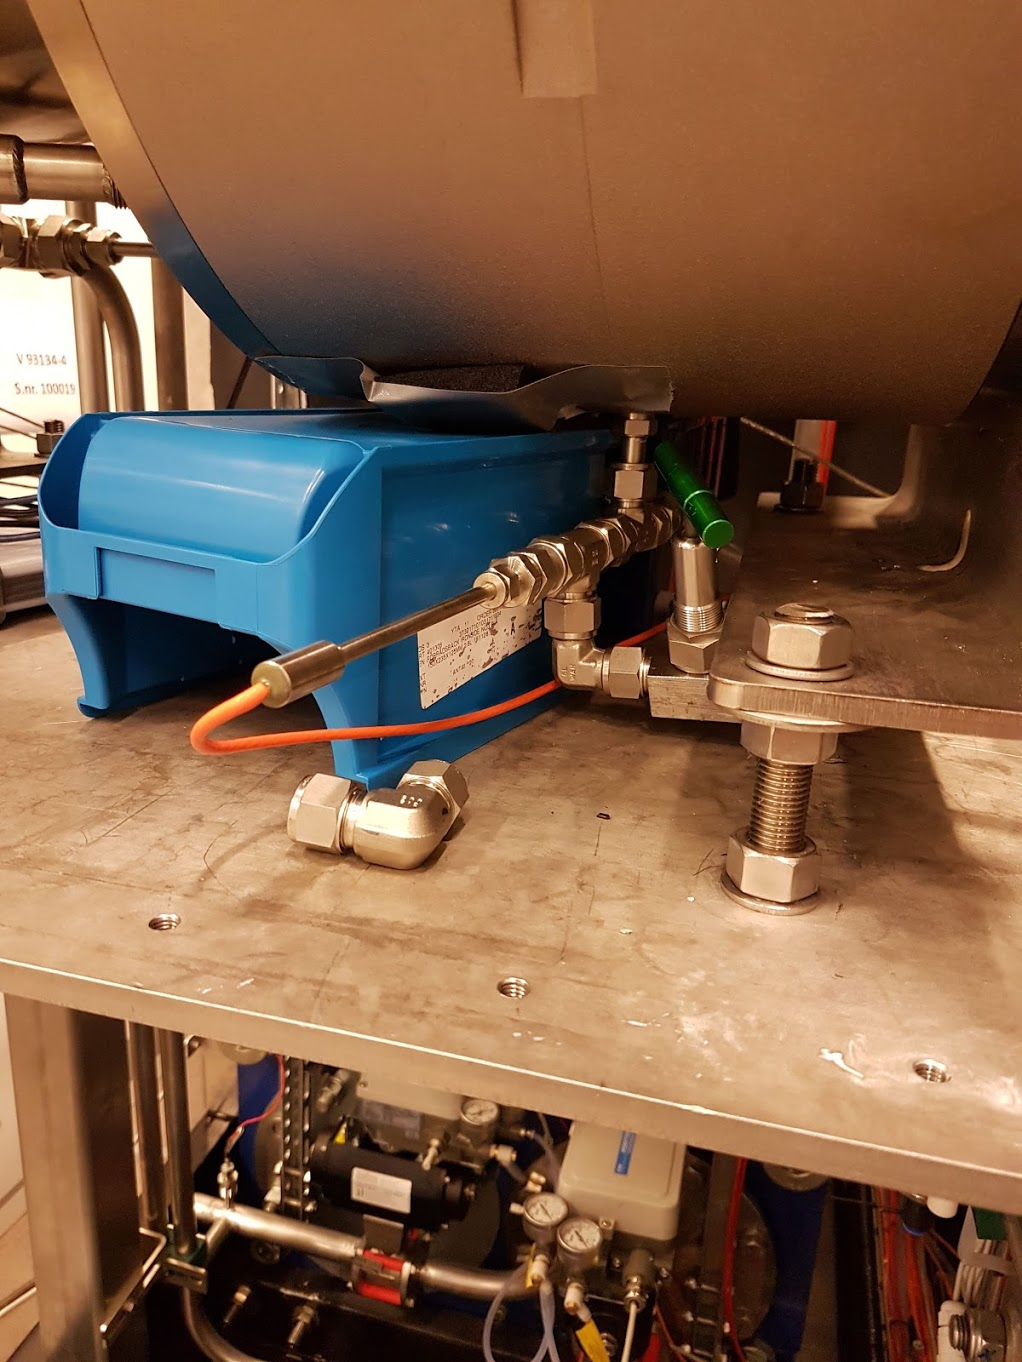

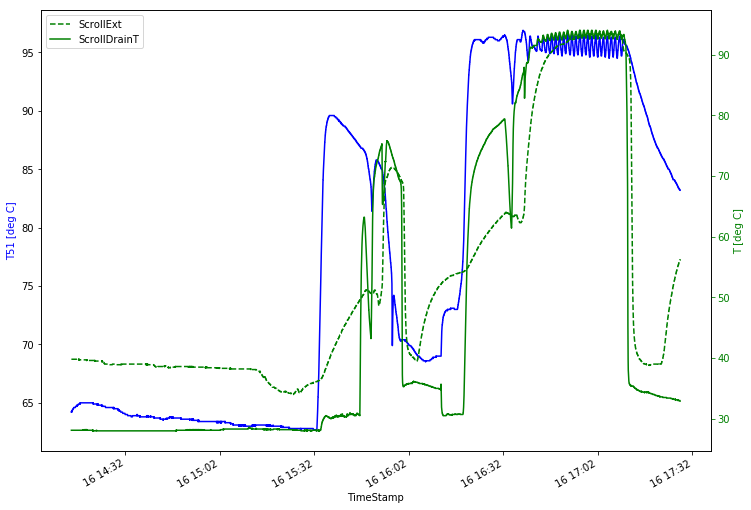

In [28]:
fig40, ax40 = plt.subplots(figsize=(12,9))
f.df['T51 [deg C]'].plot(ax=ax40, color='b', label='T51')
ax40.set_ylabel('T51 [deg C]', color='b')
ax402 = ax40.twinx()
f.df['ScrollExtT [deg C]'].plot(ax=ax402, color='g', style='--', label='ScrollExt')
f.df['ScrollDrainT [deg C]'].plot(ax=ax402, color='g', label='ScrollDrainT')
ax402.set_ylabel('T [deg C]', color='g')
ax402.tick_params('y', colors='g')
ax402.legend()
#ax40.legend()


## Temperature and pressure during two start sequences comparing the scroll and turbine input (T51)

In [9]:
#start_16_1 = f.df.between_time('15:00','16:15')
start_16_1 = f.df.between_time('16:15','16:45')

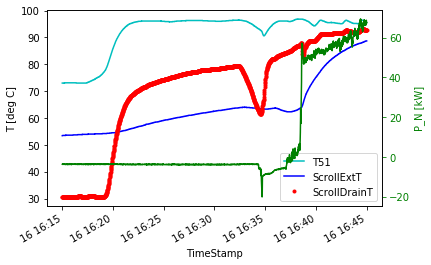

In [10]:
fig41, ax41 = plt.subplots()
ax411 = ax41.twinx()
start_16_1['P_N [kW]'].plot(ax=ax411, color='g', label='P_N [kW]')
ax411.set_ylabel('P_N [kW]', color='g')
ax411.tick_params('y', colors='g')
start_16_1['T51 [deg C]'].plot(ax=ax41, color='c', label='T51')
start_16_1['ScrollExtT [deg C]'].plot(ax=ax41, color='b', label='ScrollExtT')
start_16_1['ScrollDrainT [deg C]'].plot(ax=ax41, color='r', style='.', label='ScrollDrainT')
ax41.set_ylabel('T [deg C]')
ax41.legend()





Pressure around turbine

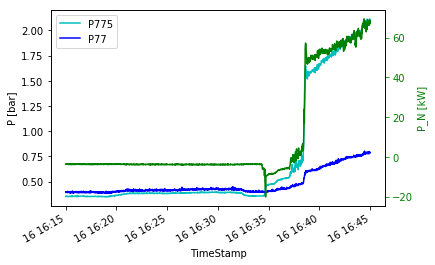

In [11]:
fig42, ax42 = plt.subplots()
ax421 = ax42.twinx()
start_16_1['P_N [kW]'].plot(ax=ax421, color='g', label='P_N [kW]')
ax421.set_ylabel('P_N [kW]', color='g')
ax421.tick_params('y', colors='g')
start_16_1['P775 [bar]'].plot(ax=ax42, color='c', label='P775')
start_16_1['P77 [bar]'].plot(ax=ax42, color='b', label='P77')
ax42.set_ylabel('P [bar]')
ax42.legend()


Pressure and temperature of scroll

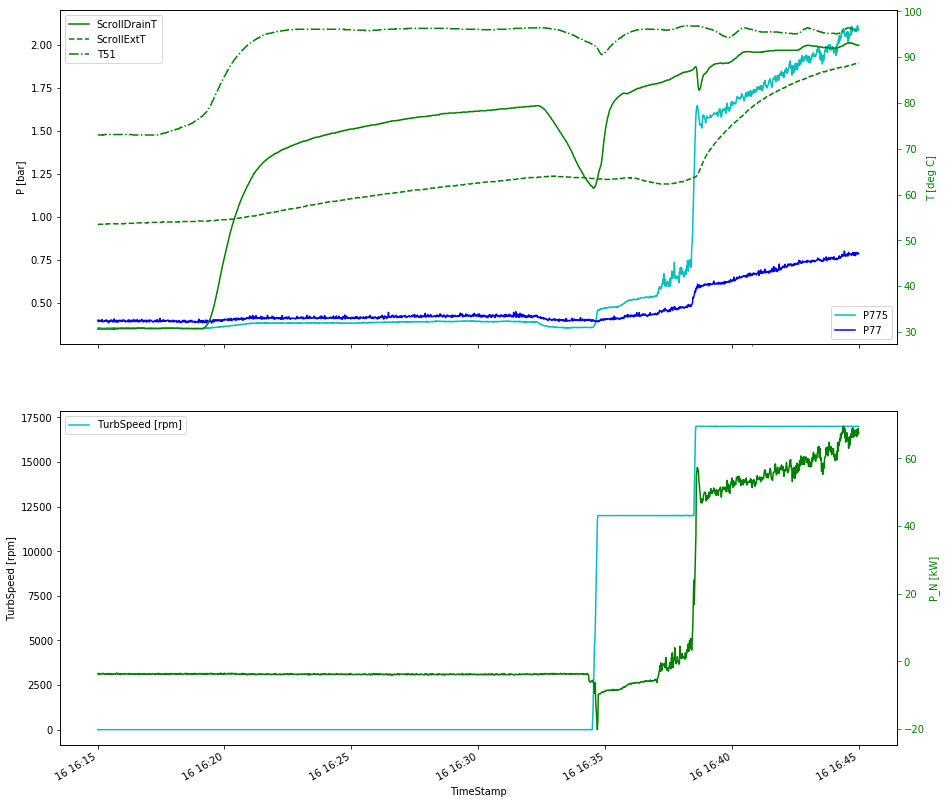

In [21]:
fig52, (ax52,ax52_2) = plt.subplots(2,1, figsize=(15,15))
ax521 = ax52.twinx()
start_16_1['ScrollDrainT [deg C]'].plot(ax=ax521, color='g', label='ScrollDrainT')
start_16_1['ScrollExtT [deg C]'].plot(ax=ax521, color='g', style='--', label='ScrollExtT')
start_16_1['T51 [deg C]'].plot(ax=ax521, color='g', style='-.', label='T51')

ax521.set_ylabel('T [deg C]', color='g')
ax521.tick_params('y', colors='g')
start_16_1['P775 [bar]'].plot(ax=ax52, color='c', label='P775')
start_16_1['P77 [bar]'].plot(ax=ax52, color='b', label='P77')
ax52.set_ylabel('P [bar]')
ax52.legend(loc=4)
ax521.legend(loc=2)

ax521_2 = ax52_2.twinx()
start_16_1['P_N [kW]'].plot(ax=ax521_2, color='g', label='P_N [kW]')
ax521_2.set_ylabel('P_N [kW]', color='g')
ax521_2.tick_params('y', colors='g')
start_16_1['TurbSpeed [rpm]'].plot(ax=ax52_2, color='c', label='TurbSpeed [rpm]')
ax52_2.set_ylabel('TurbSpeed [rpm]')
ax52_2.legend()

Pressure difference across turbine

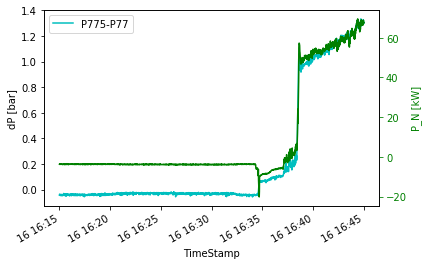

In [13]:

fig43, ax43 = plt.subplots()
ax431 = ax43.twinx()
start_16_1['P_N [kW]'].plot(ax=ax431, color='g', label='P_N [kW]')
ax431.set_ylabel('P_N [kW]', color='g')
ax431.tick_params('y', colors='g')
start_16_1['P775 [bar]'].sub(start_16_1['P77 [bar]']).plot(ax=ax43, color='c', label='P775-P77')
ax43.set_ylabel('dP [bar]')
ax43.legend()